In [4]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from wrf import (to_np, getvar, ll_to_xy)

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.calc import resample_nn_1d
from datetime import datetime
import os
import pandas as pd
import wrf

In [22]:
def wrf_skew(ncfile, lat, lon):
    ncfile = Dataset(ncfile)
    p_wrf = getvar(ncfile, "p", units="hPa")
    z_wrf = getvar(ncfile, "z", units="m")
    t_wrf = getvar(ncfile, "tc")
    td_wrf = getvar(ncfile, "td", units="degC")
    u_wrf = getvar(ncfile, "uvmet", units="kt")[0,:]
    v_wrf = getvar(ncfile, "uvmet", units="kt")[1,:]
    xloc, yloc = to_np(ll_to_xy(ncfile, lat, lon))
    p_wrf = p_wrf.sel(south_north=yloc, west_east=xloc)
    z_wrf = z_wrf.sel(south_north=yloc, west_east=xloc)
    t_wrf = t_wrf.sel(south_north=yloc, west_east=xloc)
    td_wrf = td_wrf.sel(south_north=yloc, west_east=xloc)
    u_wrf = u_wrf.sel(south_north=yloc, west_east=xloc)
    v_wrf = v_wrf.sel(south_north=yloc, west_east=xloc)

    return p_wrf, t_wrf, td_wrf, z_wrf, u_wrf, v_wrf

def plot_skew(p, t, td, z, u, v):
    date = datetime(2019, 7, 20, 0, 30)
    lat_lon = 44.45, -86.87
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig, rotation=45)
    skew.plot(p, t, 'r')
    skew.plot(p, td, 'g')
    skew.plot_barbs(p, u, v)
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-40, 60)
    skew.plot_dry_adiabats(alpha=0.25, linewidth=1)
    skew.plot_moist_adiabats(alpha=0.25, linewidth=1)
    skew.plot_mixing_lines(alpha=0.25, linewidth=1)
    ax_hod = inset_axes(skew.ax, '30%', '30%', loc=1)
    h = Hodograph(ax_hod, component_range=80.)
    h.add_grid(increment=20)
    h.plot(u[::2], v[::2], color='black', linewidth=1)
    plt.title('WRF Simulated Sounding at {} {} UTC'.format(lat_lon, date.strftime('%m/%d/%Y %H%M'), fontsize=16, weight='bold'))
    plt.show()

def wrf_skewt(ncfile, lat, lon):
    ncfile = Dataset(ncfile)
    p_wrf = getvar(ncfile, "p", units="hPa")
    z_wrf = getvar(ncfile, "z", units="m")
    t_wrf = getvar(ncfile, "tc")
    td_wrf = getvar(ncfile, "td", units="degC")
    u_wrf = getvar(ncfile, "uvmet", units="kt")[0,:]
    v_wrf = getvar(ncfile, "uvmet", units="kt")[1,:]
    time = wrf.extract_times(ncfile, timeidx=0)
    time = pd.to_datetime(str(time))
    xloc, yloc = to_np(ll_to_xy(ncfile, lat, lon))
    p_wrf = p_wrf.sel(south_north=yloc, west_east=xloc)
    z_wrf = z_wrf.sel(south_north=yloc, west_east=xloc)
    t_wrf = t_wrf.sel(south_north=yloc, west_east=xloc)
    td_wrf = td_wrf.sel(south_north=yloc, west_east=xloc)
    u_wrf = u_wrf.sel(south_north=yloc, west_east=xloc)
    v_wrf = v_wrf.sel(south_north=yloc, west_east=xloc)

    lat_lon = 44.45, -86.87
    fig = plt.figure(figsize=(9, 6))
    skew = SkewT(fig, rotation=45)
    plt.title('WRF Simulated Sounding at {} {} UTC'.format(lat_lon, time.strftime('%m/%d/%Y %H:%M'), fontsize=16, weight='bold'))
    skew.plot(p_wrf, t_wrf, 'r', linewidth=2)
    skew.plot(p_wrf, td_wrf, 'g', linewidth=2)
    skew.plot_barbs(p_wrf[::2], u_wrf[::2], v_wrf[::2])
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-40, 60)
    skew.plot_dry_adiabats(alpha=0.25, linewidth=1)
    skew.plot_moist_adiabats(alpha=0.25, linewidth=1)
    skew.plot_mixing_lines(alpha=0.25, linewidth=1)
    plt.ylabel('Pressure (hPa)')
    plt.xlabel('Temperature (C)')
    ax_hod = inset_axes(skew.ax, '30%', '30%', loc=1)
    h = Hodograph(ax_hod, component_range=80.)
    h.add_grid(increment=20)
    h.plot(u_wrf[::2], v_wrf[::2], color='black', linewidth=1)
    plt.tight_layout()
    #plt.savefig('wrf_skewt_{}'.format(time.strftime('%Y%m%d%H%M')), bbox_inches='tight')
    #plt.show()
    #print(t_wrf)
    print(z_wrf)

def wrf_skewt2(ncfile, lat, lon):
    ncfile = Dataset(ncfile)
    p_wrf = getvar(ncfile, "p", units="hPa")
    z_wrf = getvar(ncfile, "z", units="m")
    t_wrf = getvar(ncfile, "tc")
    td_wrf = getvar(ncfile, "td", units="degC")
    u_wrf = getvar(ncfile, "uvmet", units="kt")[0,:]
    v_wrf = getvar(ncfile, "uvmet", units="kt")[1,:]
    time = wrf.extract_times(ncfile, timeidx=0)
    time = pd.to_datetime(str(time))
    xloc, yloc = to_np(ll_to_xy(ncfile, lat, lon))
    p_wrf = p_wrf.sel(south_north=yloc, west_east=xloc)
    z_wrf = z_wrf.sel(south_north=yloc, west_east=xloc)
    t_wrf = t_wrf.sel(south_north=yloc, west_east=xloc)
    td_wrf = td_wrf.sel(south_north=yloc, west_east=xloc)
    u_wrf = u_wrf.sel(south_north=yloc, west_east=xloc)
    v_wrf = v_wrf.sel(south_north=yloc, west_east=xloc)

    lat_lon = 44.45, -86.87
    fig = plt.figure(figsize=(12, 9))
    skew = SkewT(fig, rotation=45)
    plt.title('WRF Simulated Sounding at {} {} UTC'.format(lat_lon, time.strftime('%m/%d/%Y %H:%M'), fontsize=16, weight='bold'))
    skew.plot(p_wrf, t_wrf, 'r', linewidth=4)
    skew.plot(p_wrf, td_wrf, 'g', linewidth=4)
    skew.plot_barbs(p_wrf[::2], u_wrf[::2], v_wrf[::2])
    skew.ax.set_ylim(1000, 500)
    skew.ax.set_xlim(-10, 40)
    skew.plot_dry_adiabats(alpha=0.25, linewidth=1)
    skew.plot_moist_adiabats(alpha=0.25, linewidth=1)
    skew.plot_mixing_lines(alpha=0.25, linewidth=1)
    plt.ylabel('Pressure (hPa)')
    plt.xlabel('Temperature (C)')
    plt.tight_layout()
    plt.savefig('wrf_skewt_{}'.format(time.strftime('%Y%m%d%H%M')), bbox_inches='tight')
    plt.show()

C:\Users\Tony\AppData\Local\Temp\ipykernel_23216\3126224748.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<xarray.DataArray 'height' (bottom_top: 79)>
array([  200.72723,   260.053  ,   337.30328,   436.363  ,   561.1831 ,
         716.73285,   908.5392 ,  1142.0283 ,  1422.0142 ,  1750.3813 ,
        2100.9043 ,  2447.739  ,  2790.973  ,  3130.6282 ,  3466.751  ,
        3799.4385 ,  4128.785  ,  4454.8125 ,  4777.521  ,  5097.0054 ,
        5413.438  ,  5726.982  ,  6037.787  ,  6346.068  ,  6652.164  ,
        6956.46   ,  7259.18   ,  7560.297  ,  7859.614  ,  8156.9185 ,
        8452.055  ,  8744.925  ,  9035.497  ,  9323.787  ,  9609.85   ,
        9893.753  , 10175.551  , 10455.271  , 10732.925  , 11008.462  ,
       11281.879  , 11553.913  , 11825.009  , 12094.207  , 12360.627  ,
       12624.093  , 12884.611  , 13142.203  , 13396.908  , 13648.792  ,
       13897.8955 , 14144.1455 , 14387.713  , 14629.28   , 14869.06   ,
       15108.316  , 15350.961  , 15597.099  , 15842.665  , 16086.729  ,
       16331.514  , 16578.707  , 16828.322  , 17079.49   , 17331.342  ,
       17583.611  ,

C:\Users\Tony\AppData\Local\Temp\ipykernel_23216\3126224748.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<xarray.DataArray 'height' (bottom_top: 79)>
array([  200.55763,   259.99716,   337.56204,   436.56186,   561.2318 ,
         716.7125 ,   908.5072 ,  1141.9954 ,  1421.964  ,  1750.1743 ,
        2100.2866 ,  2446.466  ,  2788.8728 ,  3127.638  ,  3462.8818 ,
        3794.7214 ,  4123.278  ,  4448.6333 ,  4770.7915 ,  5089.729  ,
        5405.497  ,  5718.255  ,  6028.195  ,  6335.513  ,  6640.4966 ,
        6943.624  ,  7245.419  ,  7546.1016 ,  7845.4507 ,  8143.054  ,
        8438.577  ,  8731.833  ,  9022.781  ,  9311.497  ,  9598.113  ,
        9882.71   , 10165.228  , 10445.58   , 10723.985  , 11001.238  ,
       11277.7705 , 11552.361  , 11823.91   , 12092.4375 , 12358.058  ,
       12620.947  , 12881.193  , 13138.7705 , 13393.602  , 13645.538  ,
       13894.4375 , 14140.321  , 14383.669  , 14625.43   , 14866.504  ,
       15108.4795 , 15353.987  , 15601.048  , 15846.473  , 16091.258  ,
       16336.961  , 16584.35   , 16833.34   , 17083.547  , 17334.375  ,
       17585.416  ,

C:\Users\Tony\AppData\Local\Temp\ipykernel_23216\3126224748.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<xarray.DataArray 'height' (bottom_top: 79)>
array([  200.72061,   260.48117,   338.18274,   437.1009 ,   561.7037 ,
         717.20026,   909.06537,  1142.6704 ,  1422.7762 ,  1751.0123 ,
        2100.874  ,  2446.624  ,  2788.6729 ,  3127.173  ,  3462.1797 ,
        3793.836  ,  4122.274  ,  4447.5566 ,  4769.665  ,  5088.5845 ,
        5404.424  ,  5717.391  ,  6027.7153 ,  6335.664  ,  6641.618  ,
        6946.022  ,  7249.151  ,  7550.951  ,  7851.1123 ,  8149.2544 ,
        8445.068  ,  8738.369  ,  9029.095  ,  9317.278  ,  9603.03   ,
        9886.498  , 10167.823  , 10447.475  , 10726.371  , 11004.676  ,
       11281.415  , 11555.563  , 11826.685  , 12094.773  , 12359.929  ,
       12622.261  , 12881.832  , 13138.659  , 13392.762  , 13644.189  ,
       13892.95   , 14138.987  , 14382.177  , 14622.746  , 14861.128  ,
       15099.761  , 15342.767  , 15588.379  , 15833.247  , 16078.475  ,
       16325.102  , 16573.203  , 16822.611  , 17073.107  , 17324.367  ,
       17576.098  ,

C:\Users\Tony\AppData\Local\Temp\ipykernel_23216\3126224748.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<xarray.DataArray 'height' (bottom_top: 79)>
array([  200.77203,   259.76028,   335.1367 ,   430.50183,   550.3657 ,
         700.0151 ,   885.47076,  1112.7827 ,  1387.1127 ,  1710.4142 ,
        2056.9023 ,  2401.6045 ,  2744.1335 ,  3083.944  ,  3421.1064 ,
        3754.9473 ,  4085.3425 ,  4412.792  ,  4737.557  ,  5059.69   ,
        5379.107  ,  5695.6685 ,  6009.55   ,  6321.0806 ,  6630.273  ,
        6936.9966 ,  7241.378  ,  7543.7656 ,  7844.514  ,  8143.705  ,
        8439.886  ,  8732.293  ,  9022.803  ,  9312.151  ,  9599.897  ,
        9886.155  , 10170.843  , 10453.535  , 10733.806  , 11011.572  ,
       11286.896  , 11559.676  , 11829.776  , 12097.153  , 12361.716  ,
       12623.381  , 12882.16   , 13138.116  , 13391.255  , 13641.555  ,
       13889.022  , 14133.632  , 14375.49   , 14614.993  , 14852.223  ,
       15091.345  , 15335.47   , 15581.523  , 15827.924  , 16075.359  ,
       16324.208  , 16574.172  , 16824.854  , 17076.072  , 17327.807  ,
       17580.01   ,

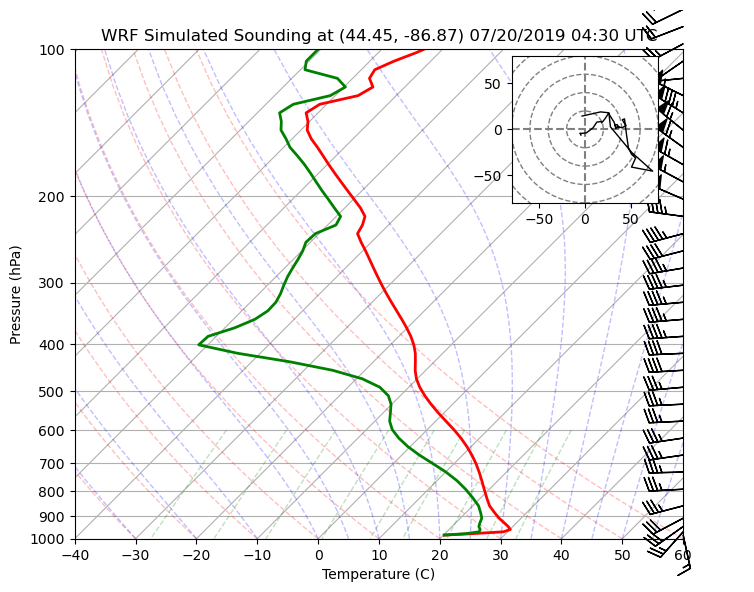

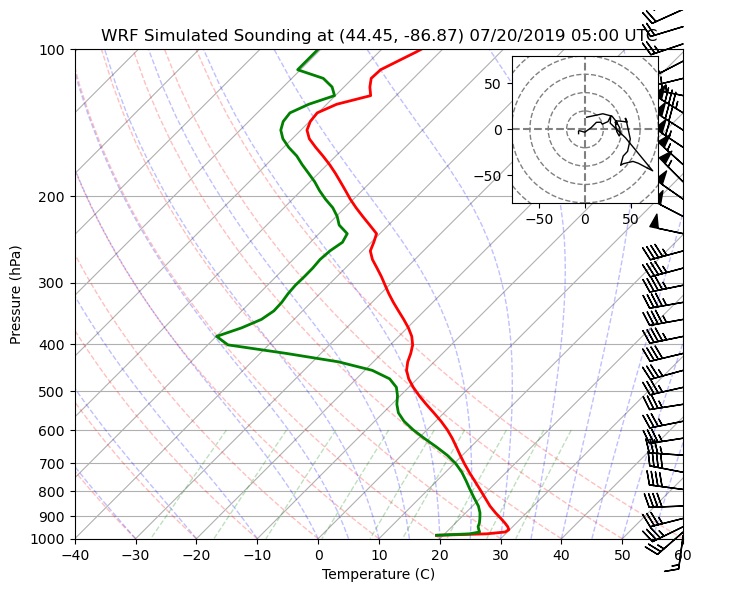

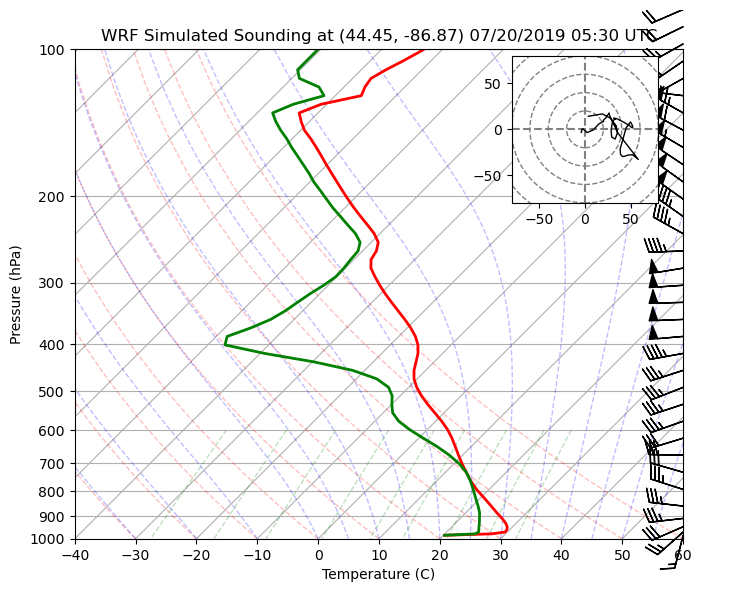

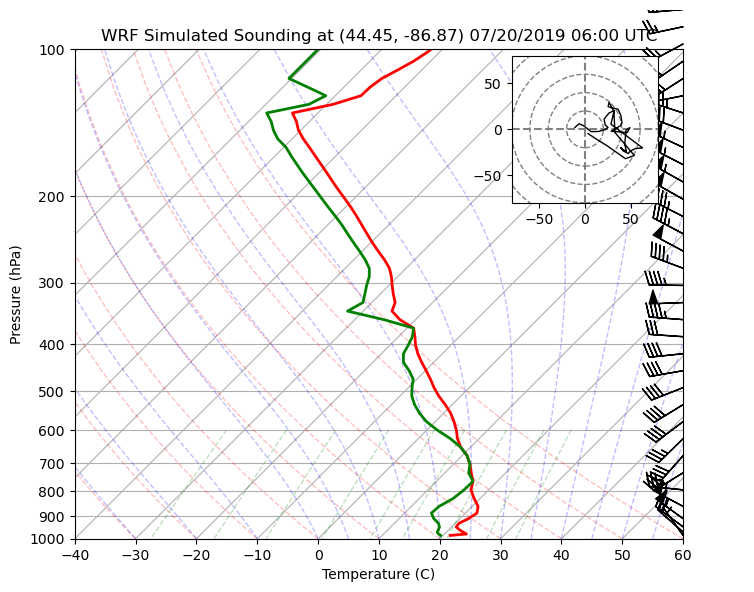

In [23]:
directory = 'C:\\Users\\Tony\\Desktop\\wrfoutput\\reduced'
for filename in os.listdir(directory):
    if filename.startswith('wrfout'):  # Ensure we're working with the correct files
        file_path = os.path.join(directory, filename)
        wrf_skewt(file_path, 44.45, -86.87)